# Анализ исторических данных для подготовки рекомендаций для увеличения продаж компьютерных игр.

<a id=0></a>
[Содержание](#0)

[1. Описание проекта](#1)

[2. Анализ данных](#2)

[3. Подготовка данных](#3)

[4. Исследовательский анализ данных](#4)

[5. Проверка гипотез](#5)

[6. Общий вывод](#6)

<a id=1></a>
## 1. Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, "Xbox" или "PlayStation"). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:**

Провести исследование с целью выявить определяющие успешность компьютерных игр закономерности.

Результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Данные:**

Исторические данные до 2016г о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах (Xbox или PlayStation), получены из открытых источников в файле:

`games.csv`

Описание столбцов:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Гипотезы для проверки:**

- Гипотеза 1: Средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые.
- Гипотеза 2: Средние пользовательские рейтинги жанров "Action" (англ. «действие», экшен-игры) и "Sports" (англ. «спортивные соревнования») одинаковые.

<a id=2></a>
[Содержание](#0)
## 2. Анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Загрузим данные из файла `/datasets/games.csv` в датафрейм `data`.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Выведем основную информацию для датафрейма `data` с помощью метода info().

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Типы данных в столбцах:

- *Категориальный:* `Name`, `Platform`, `Genre`, `Rating`.
- *Количественный:* `Year_of_Release`, `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`, `User_Score`.

В данных есть пропуски по столцам: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

Пропуски рассмотрим и обработаем в следующем разделе.

<a id=3></a>
[Содержание](#0)
## 3. Подготовка данных

Приведем названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

Посмотрим граничные значения по столбцам

In [5]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Посмотрим % пропусков к колонках

In [6]:
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Посмотрим пропуски данных в колонке 'Название'

In [7]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим 2 строки без названия игры, жанра и рейтинга

In [8]:
data.dropna(subset = ['name'], inplace = True)

Посмотрим кол-во строк с пустым годом

In [9]:
print(len(data[data['year_of_release'].isna()]))

269


Удалим значения без указания года

In [10]:
data.dropna(subset=['year_of_release'], inplace = True)

Посмотрим пропуски рейтига критиков

In [11]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим варианты значений рейтига критиков

In [12]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Посмотрим пропуски пользовательского рейтига

In [13]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим варианты значений пользовательского рейтига

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Определим кол-во значений 'tbd'

In [15]:
len(data.query('user_score == "tbd"'))

2376

Видим в колонке пользовательского рейтинга в 2376 строках значение 'tbd'. Расшифровывается с английского "to be defined". Такое обозначение часто используют когда компьютерная игра еще не прошла через определенное количество игроков или экспертов-геймеров и не получила оценку.

Для уменьшения хранимой информации и удобства обработки заменим значение 'tbd' на Nan, что не поменяет суть, но даст преобразовать тип поля в числовой на следующем шаге подготовки данных

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Посмотрим пропуски рейтинга от организации ESRB

In [17]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков в столбце `rating` очень много. Так как этот столбец категориальный, пропуски в нём можно сделать еще одной категорией и заполнить отдельным значением '--'.

In [18]:
data['rating'] = data['rating'].fillna(value = '--')

Посмотрим варианты значений рейтинга от организации ESRB

In [19]:
data['rating'].value_counts()

--      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В столбце rating есть редкие категории ('EC', 'K-A', 'RP', 'AO'), которые можно заменить на значение на отдельное значение '--'

In [20]:
data['rating'] = data['rating'].replace(['EC', 'K-A', 'RP', 'AO'], '--')

Описание категорий рейтига можно посмотреть по ссылке:

https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi    

Пропуски в столбцах `critic_score`, `user_score` и `rating`. Оценка игр походит не быстро, а может даже вообще не пройти, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка.

В столбцах `critic_score` и `user_score` нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных.

Проверим на дубликаты данных

In [21]:
print(data.duplicated().sum())

0


Оптимизируем объем датасета

In [22]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast = 'integer')
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast = 'integer')
data['user_score'] = pd.to_numeric(data['user_score'], downcast = 'float', errors = 'coerce')
data['user_score'] = data['user_score'].round(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(5), int16(1), object(4)
memory usage: 1.3+ MB


In [23]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

Добавим столбец с суммарными продажами по всем регионам

In [24]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

Было выполнено следующее:

- Название столбцов было приведено к нижнему регистру.

- Восстановлены пропуски в строках.

- Удалены строки без нужных данных.

- Добавлен столбец суммарных продаж.

**Вывод:**

Данные готовы к анализу.

<a id=4></a>
[Содержание](#0)
## 4. Исследовательский анализ данных

In [25]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126359,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499448,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Посмотрим, сколько игр выпускалось в разные годы.

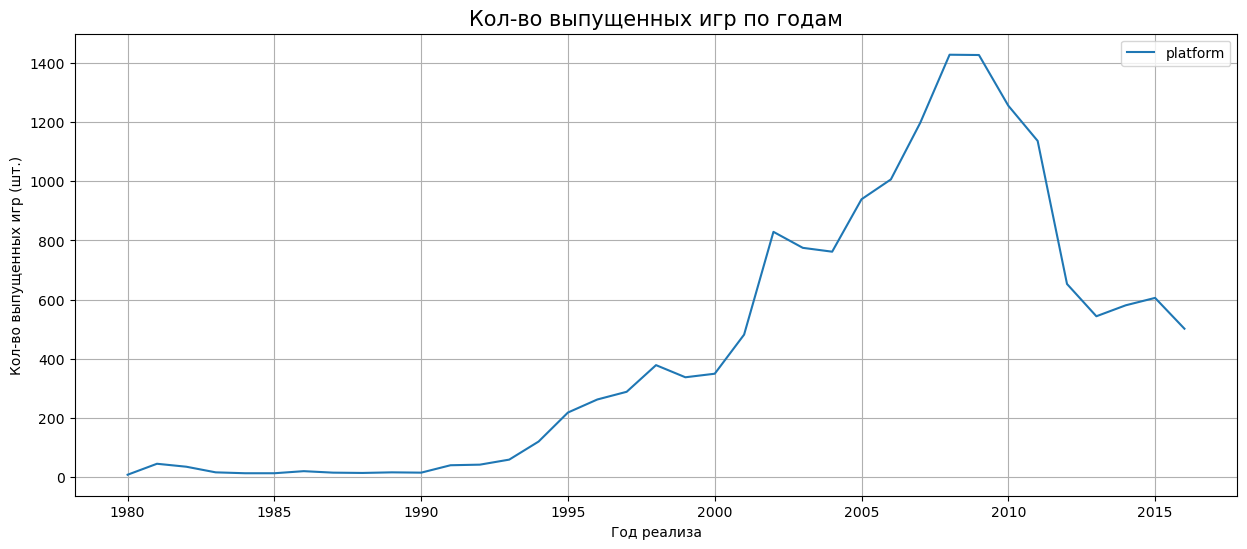

In [26]:
(data
 .pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count')
 .plot(grid = True, figsize = (15, 6)))

plt.title('Кол-во выпущенных игр по годам', size = 15)
plt.xlabel('Год реализа')
plt.ylabel('Кол-во выпущенных игр (шт.)')
plt.show()

Посмотрим суммарное кол-во продаж в разные годы

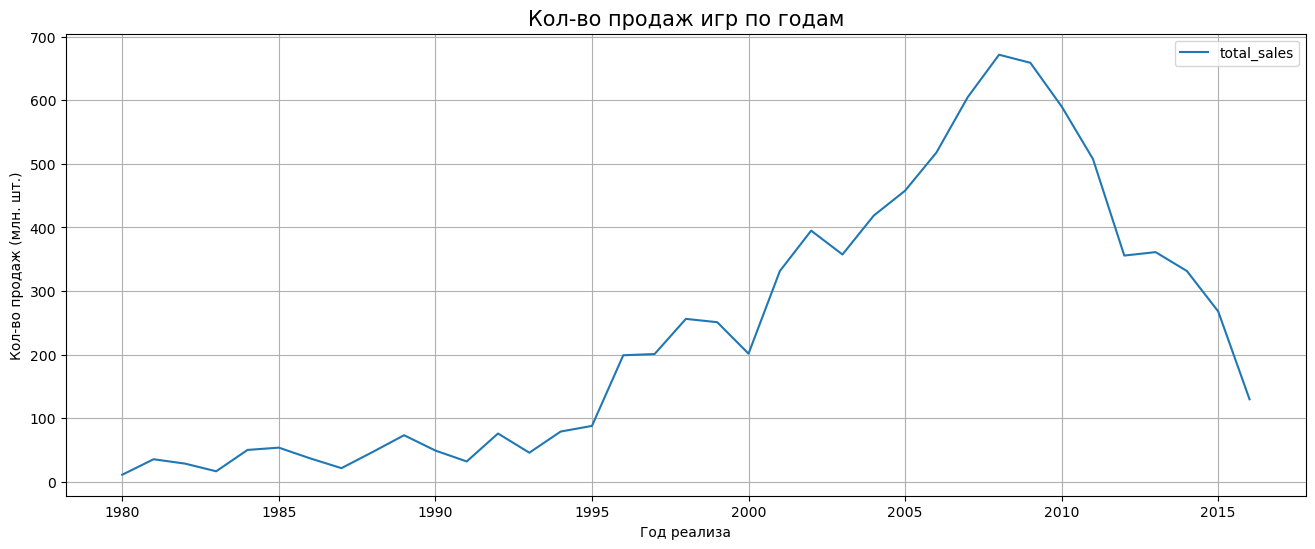

In [27]:
(data
 .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (16, 6)))

plt.title('Кол-во продаж игр по годам', size = 15)
plt.xlabel('Год реализа')
plt.ylabel('Кол-во продаж (млн. шт.)')
plt.show()

**Вывод:**

С 1980 годов по 1995 кол-во выпускаемых игр было не велико.

Рост кол-ва игр с 1996г связан с появлением персонального компьютера (PC) и новых языков программирования.

В 2002 году видно, что выпустилось много игр.

Пик в 2008 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков.

Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом и возросшими требованиям к игре.

Крупные студии-разработчики создают игры по несколько лет, так как хотят порадовать своих фанатов современными технологиями и новой графикой.

Посмотрим, как менялись продажи по платформам по годам

In [28]:
platform_years_sales_pvt = pd.pivot_table(data, index = ['platform', 'year_of_release'],
                              values = ['total_sales'], aggfunc = ['sum']).reset_index()
platform_years_sales_pvt.columns = ['platform', 'year_of_release', 'total_sales']
display(platform_years_sales_pvt)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


Просуммируем продажи по платформам за весь период

In [29]:
platform_total_sales_pvt = pd.pivot_table(platform_years_sales_pvt,
                index = 'platform', values = 'total_sales',
                aggfunc = 'sum').reset_index().sort_values('total_sales', ascending = False)
#display(platform_total_sales_pvt)

In [30]:
top_platform = platform_total_sales_pvt.query('total_sales > 100')
display(top_platform)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Посмотрим как менялись продажи по годам по Топ-платформам

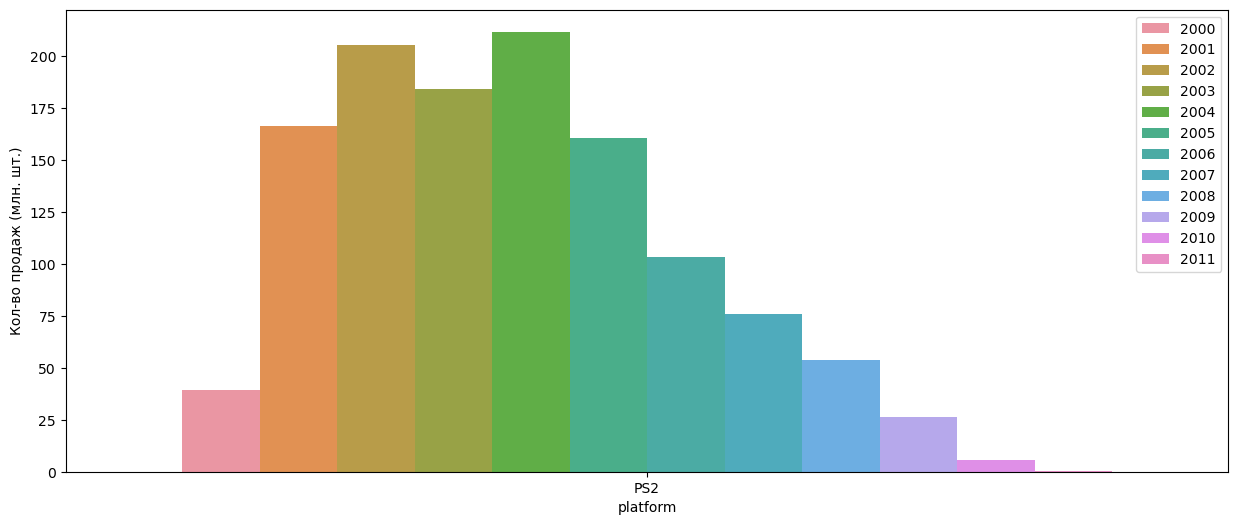

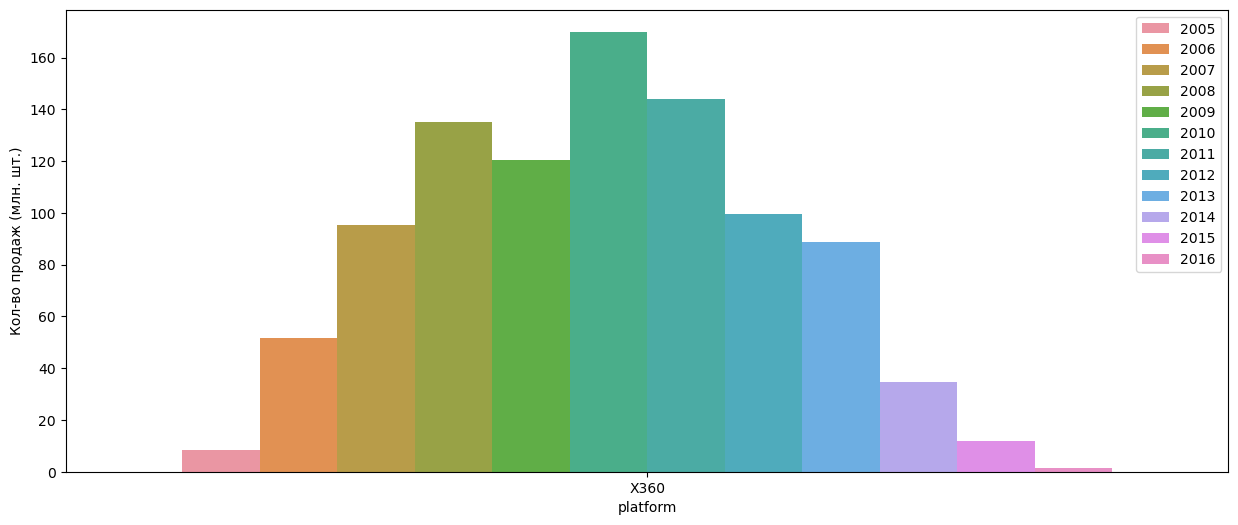

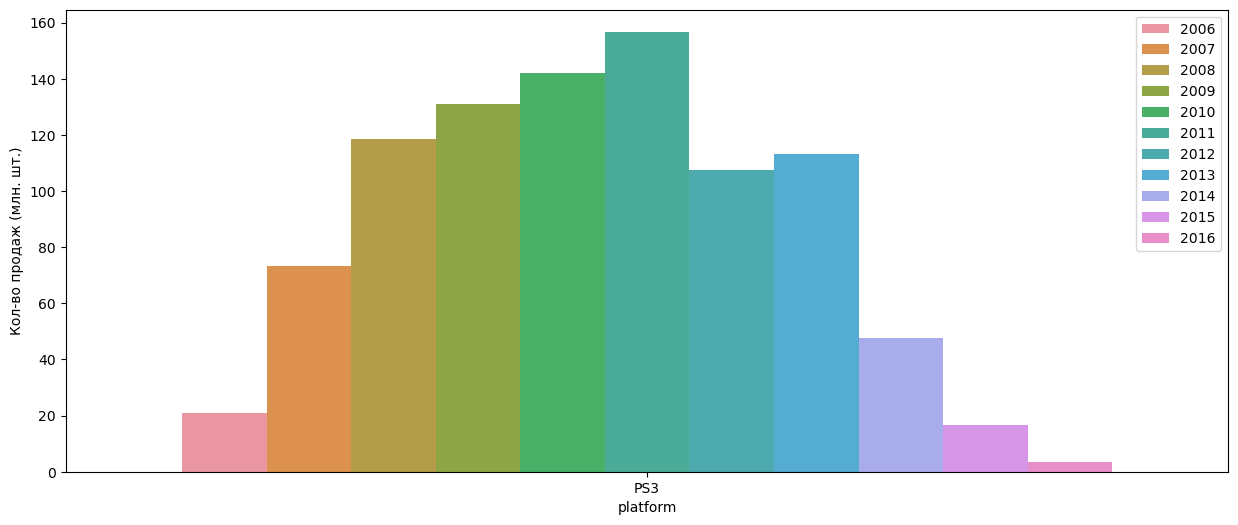

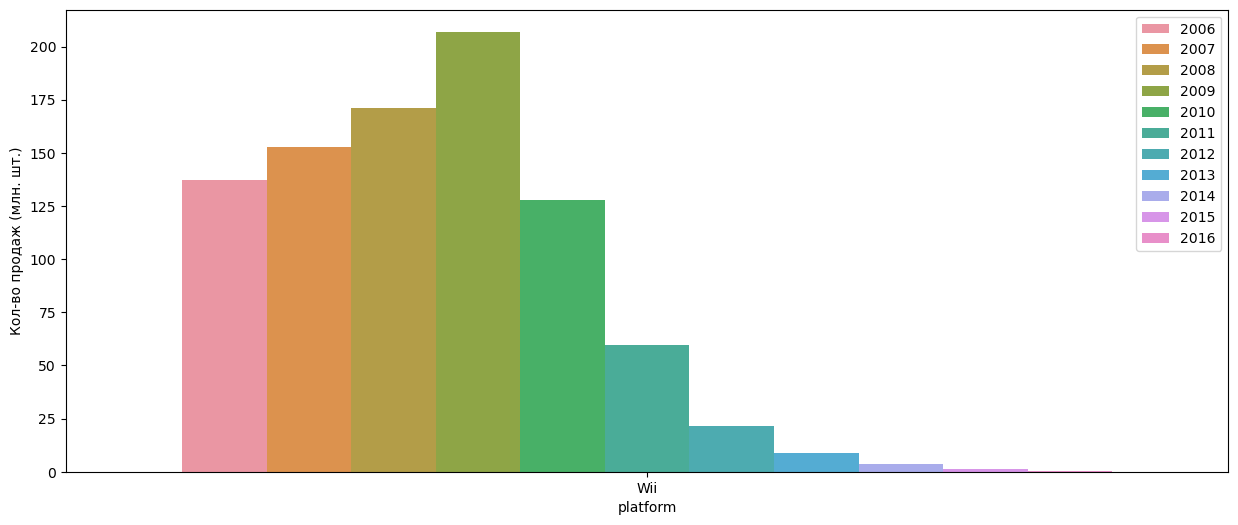

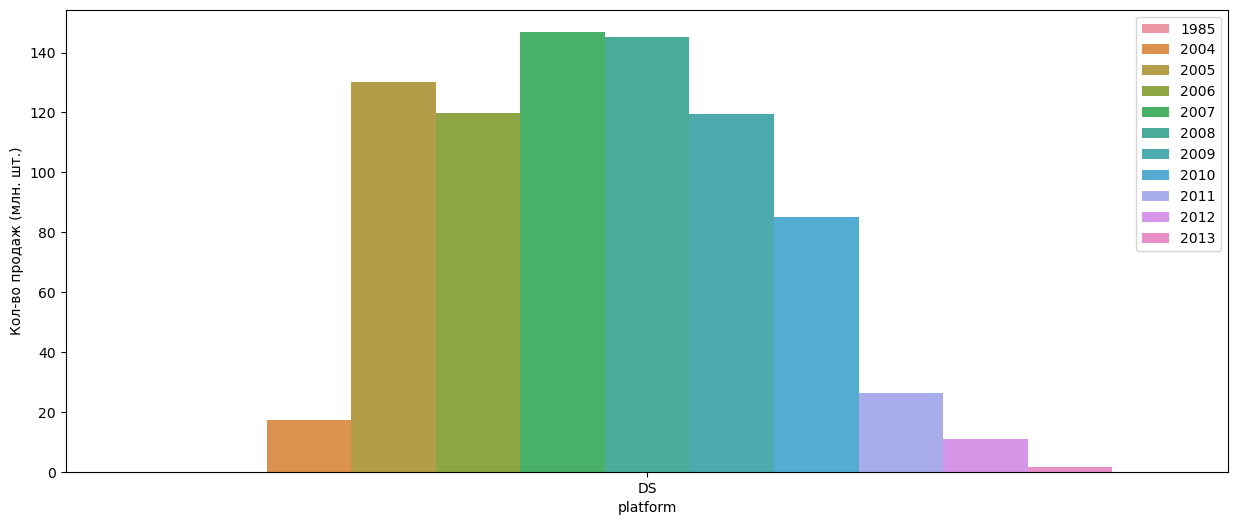

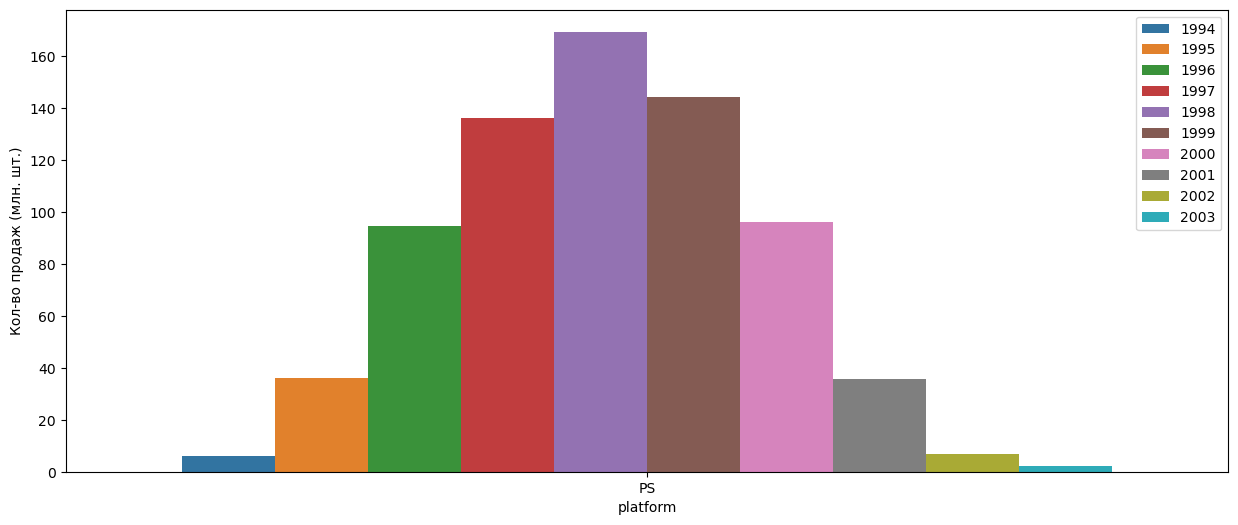

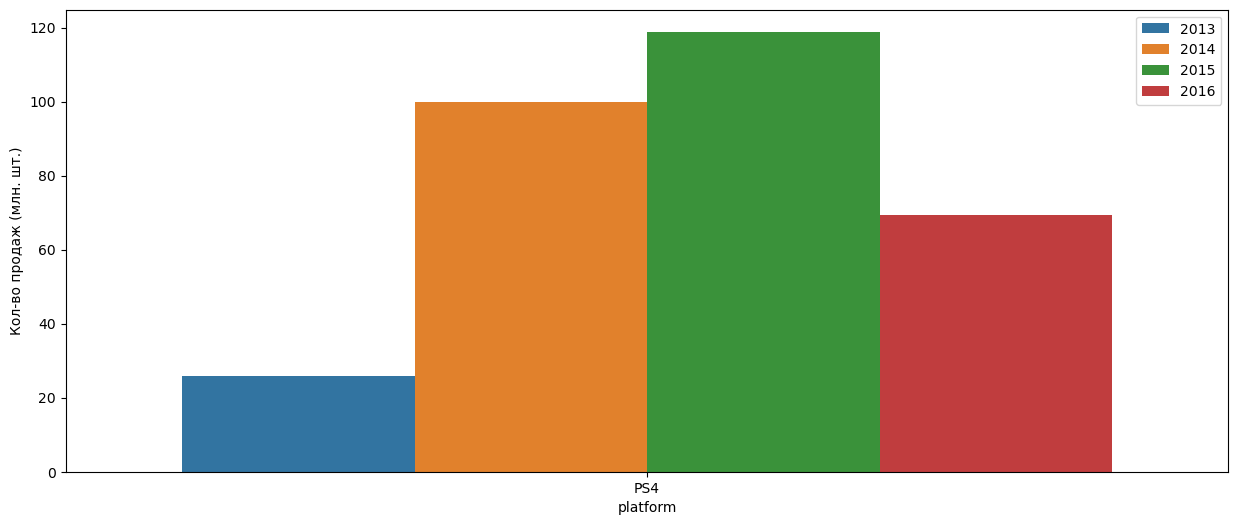

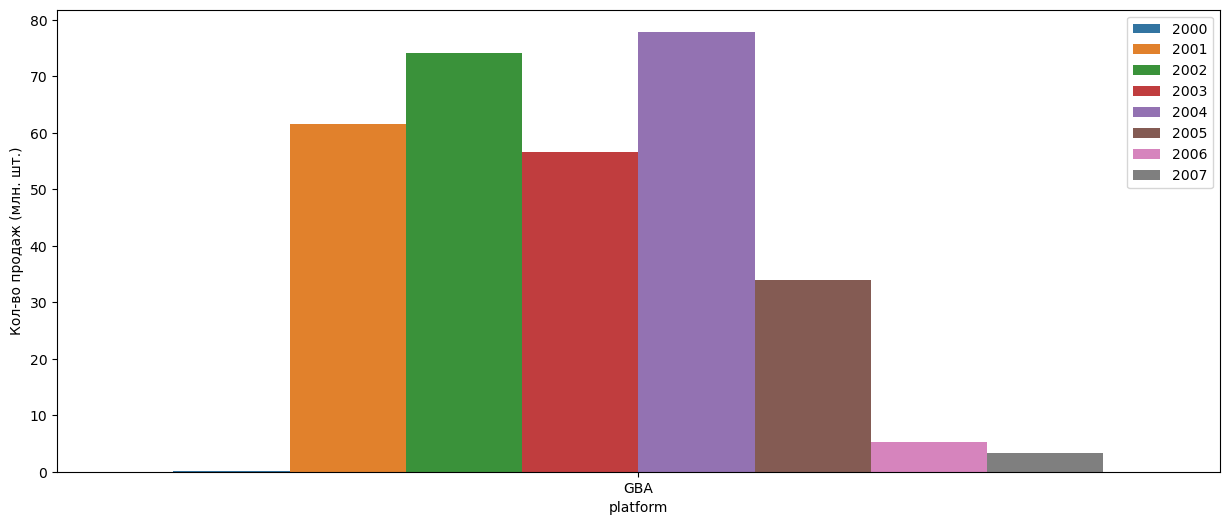

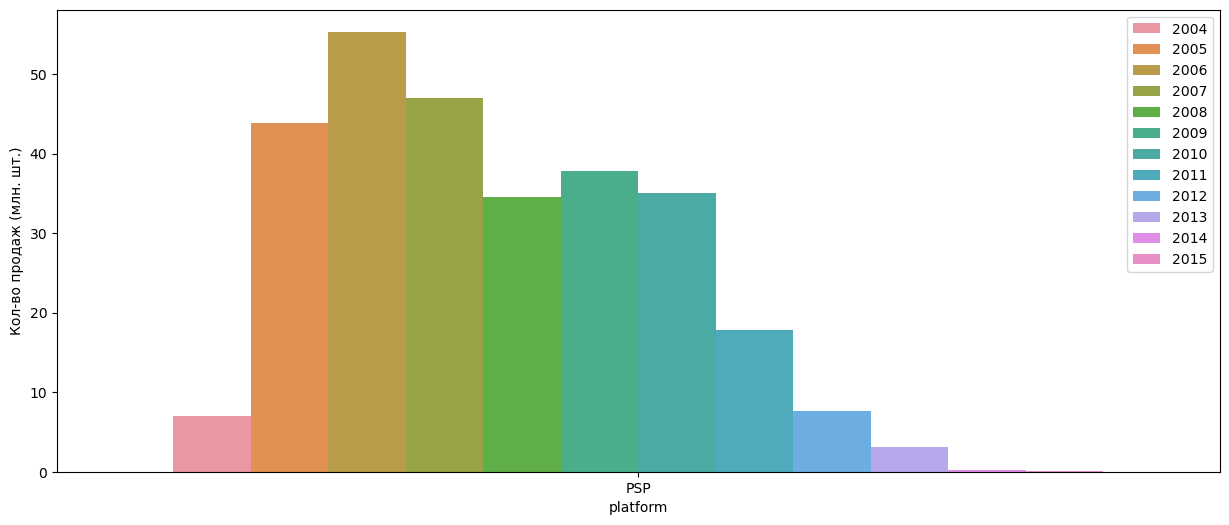

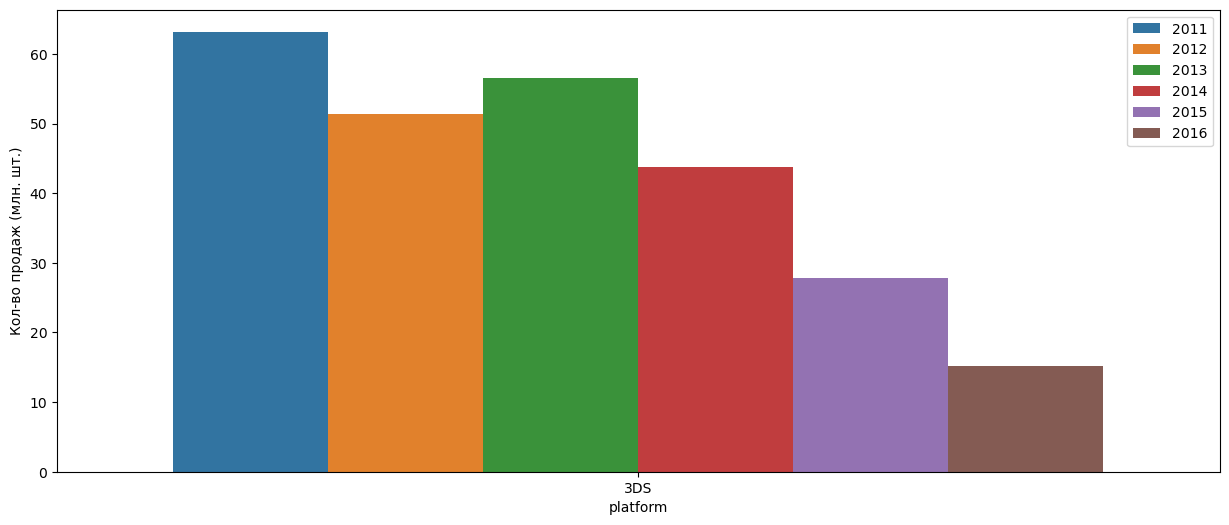

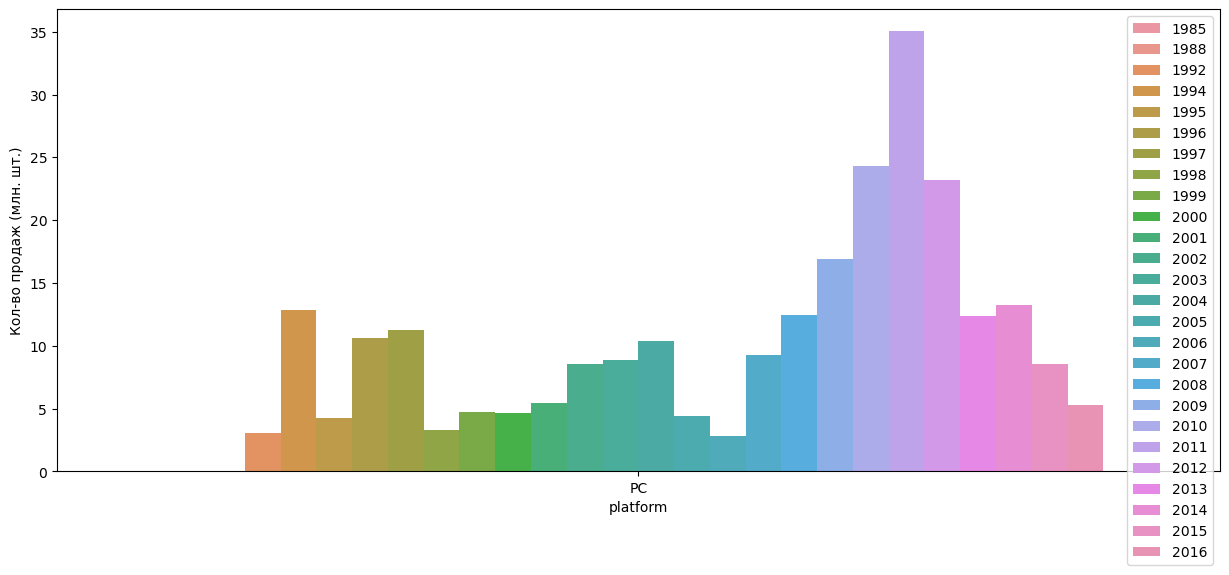

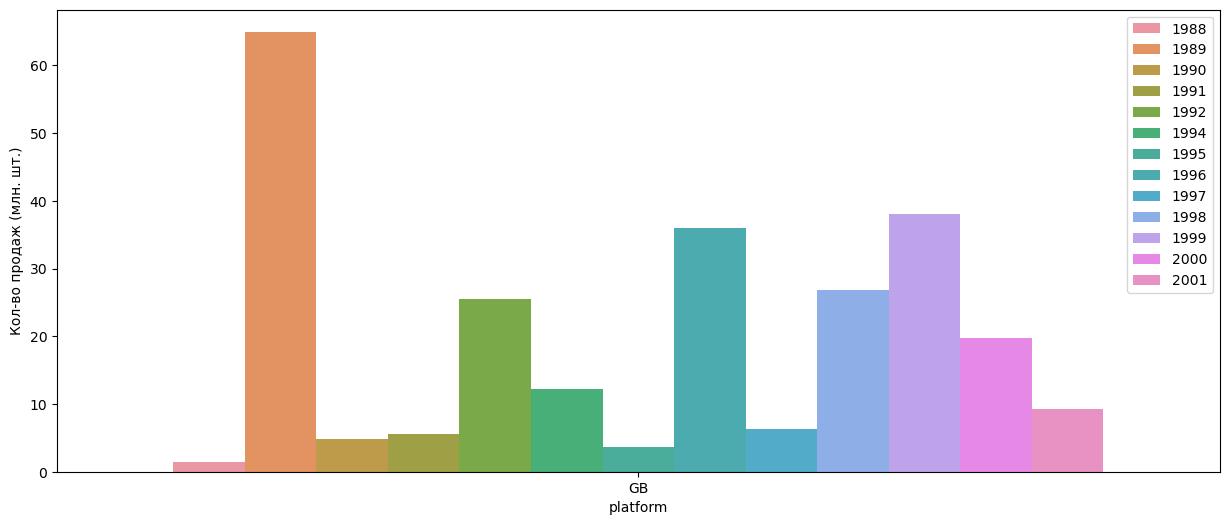

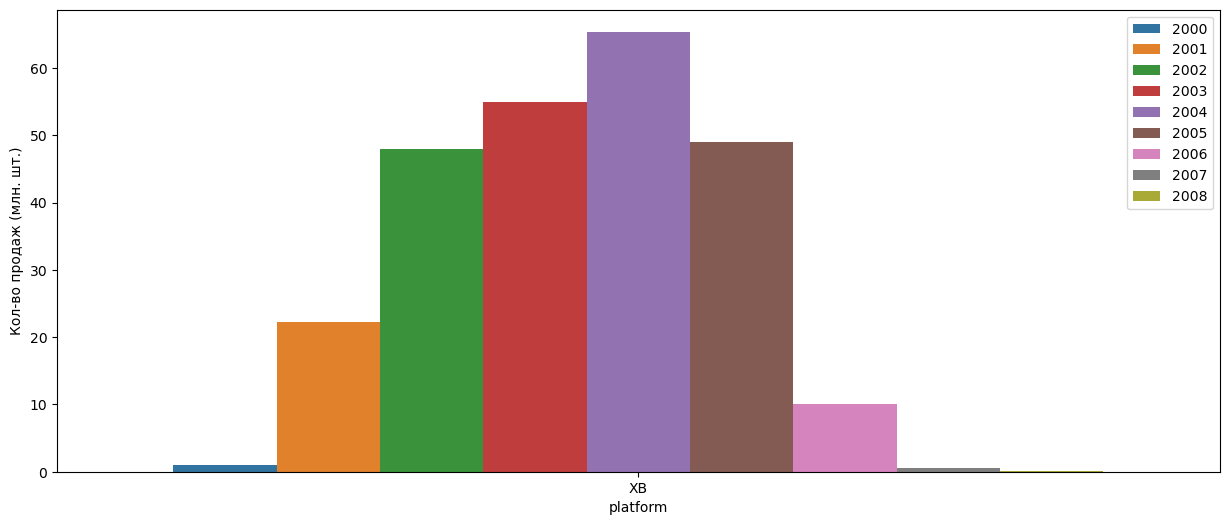

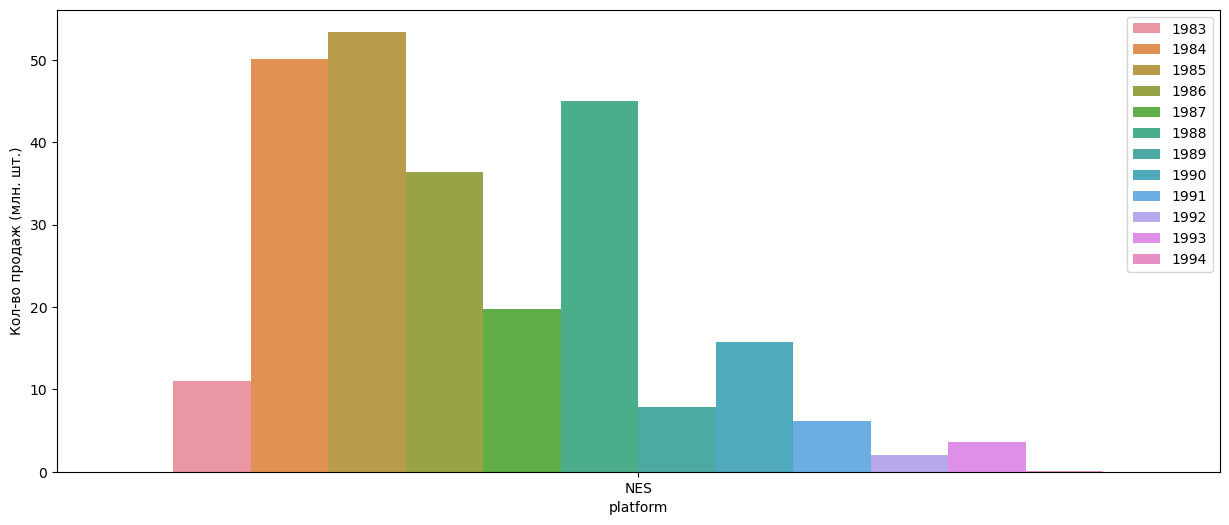

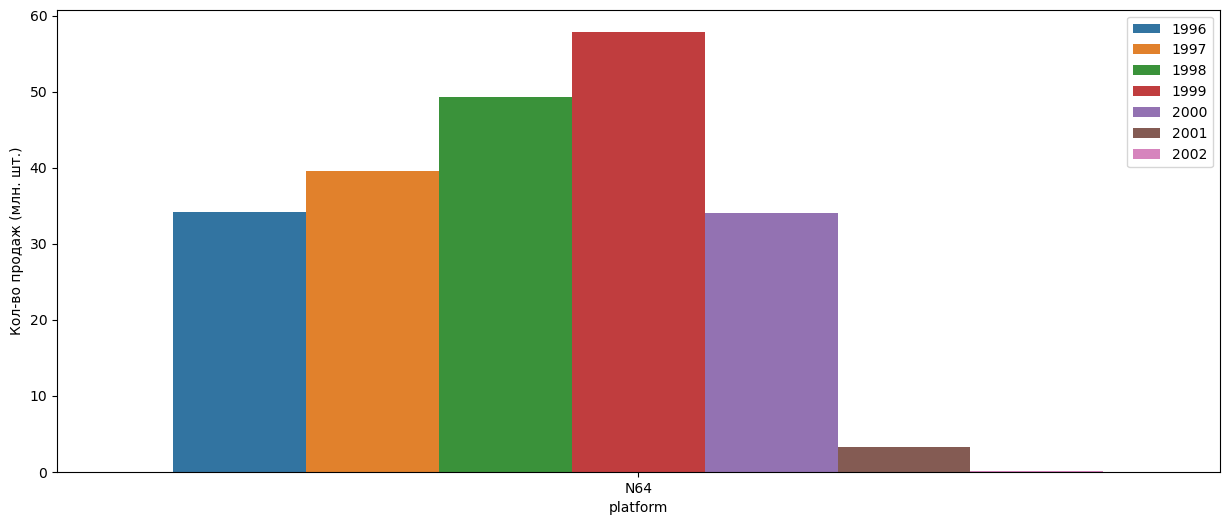

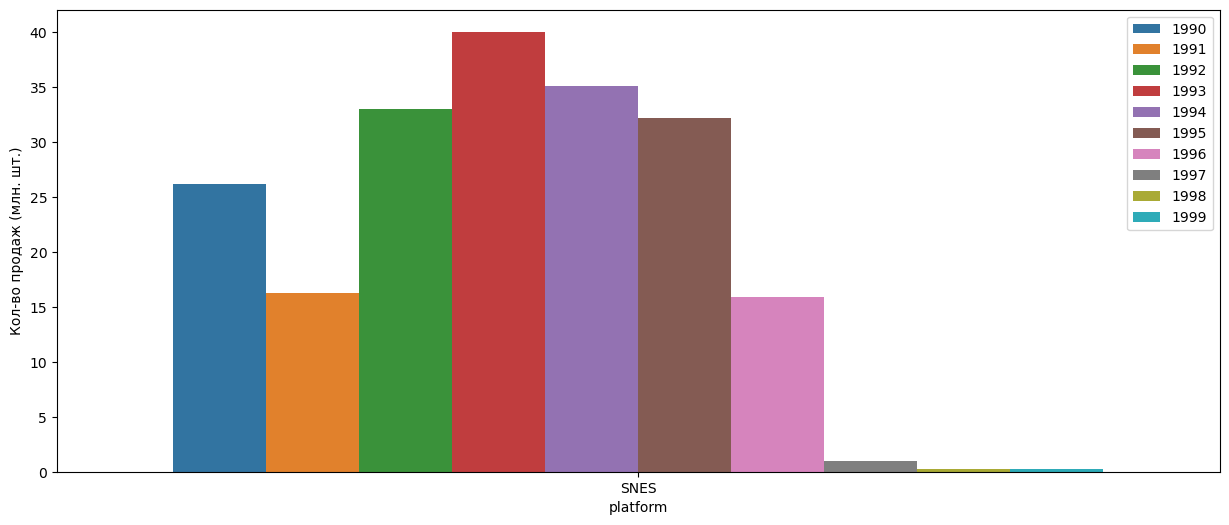

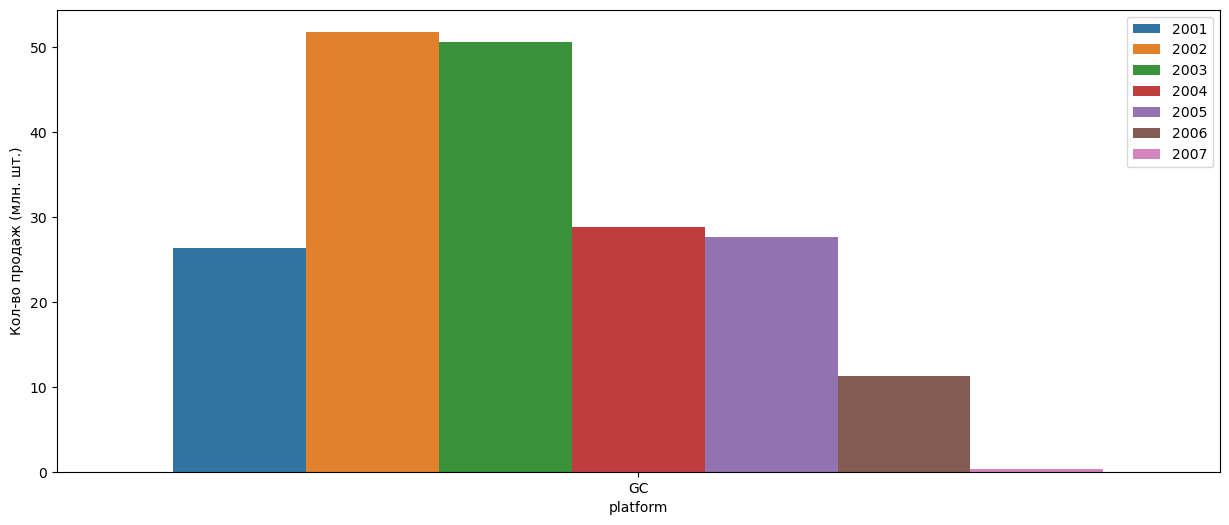

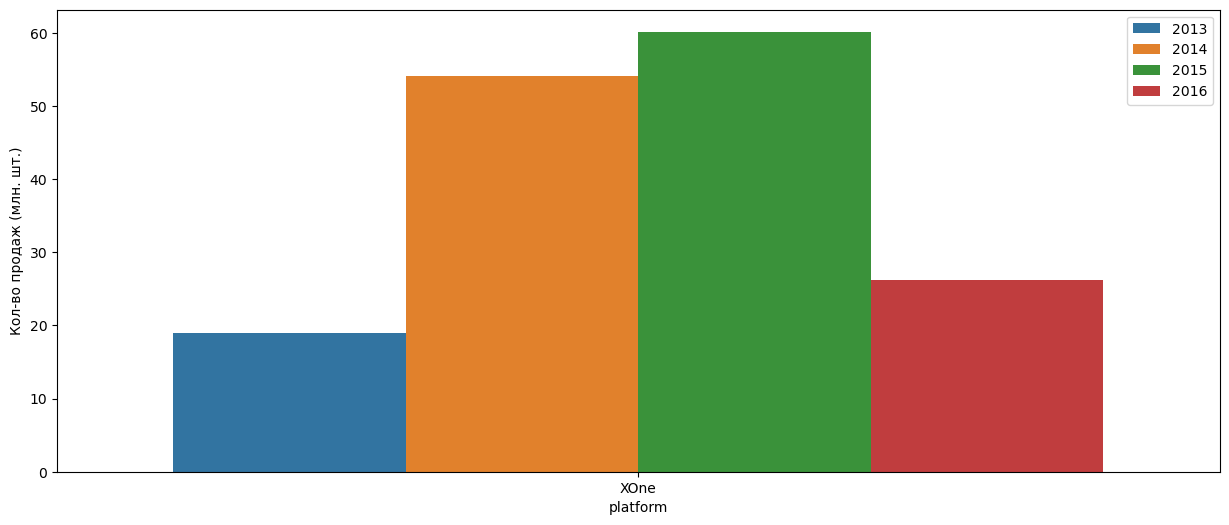

In [31]:
for platform in (top_platform['platform']):

    data_top = platform_years_sales_pvt.query('platform == @platform')
    
    plt.figure(figsize = (15,6))
    sns.barplot(x = data_top['platform'],
                y = data_top['total_sales'],
                hue = data_top['year_of_release'])
    plt.ylabel('Кол-во продаж (млн. шт.)')
    plt.legend()
    plt.show()

**Вывод:**

Для платформ, которые пользуются популярностью, срок использования равен 8-12 лет, явное исключение платформа PC - 26 лет.

Можно проследить, например, как менялись поколения для приствок PlayStation:
- PS:  1994-2003
- PS2: 2000-2011
- PS3: 2006-2016
- PS4: 2013-по сегодняшний день

Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.

XOne: 2013-по сегодняшний день

Определим период рассмотрения данных (актуальный период)

In [32]:
display(pd.pivot_table(platform_years_sales_pvt, 
                       index = 'platform', 
                       values = 'total_sales', 
                       aggfunc = 'count').median())

total_sales    7.0
dtype: float64

Медиана продолжительности существования популярной игровой платформы около 7 лет. Таким образом, рассматривать на перспективу есть смысл популярные платформы и игры в выборке не более чем за последние 3 года.

Ограничим для дальнейшего рассмотрения данные интервалом 2014-2016 гг

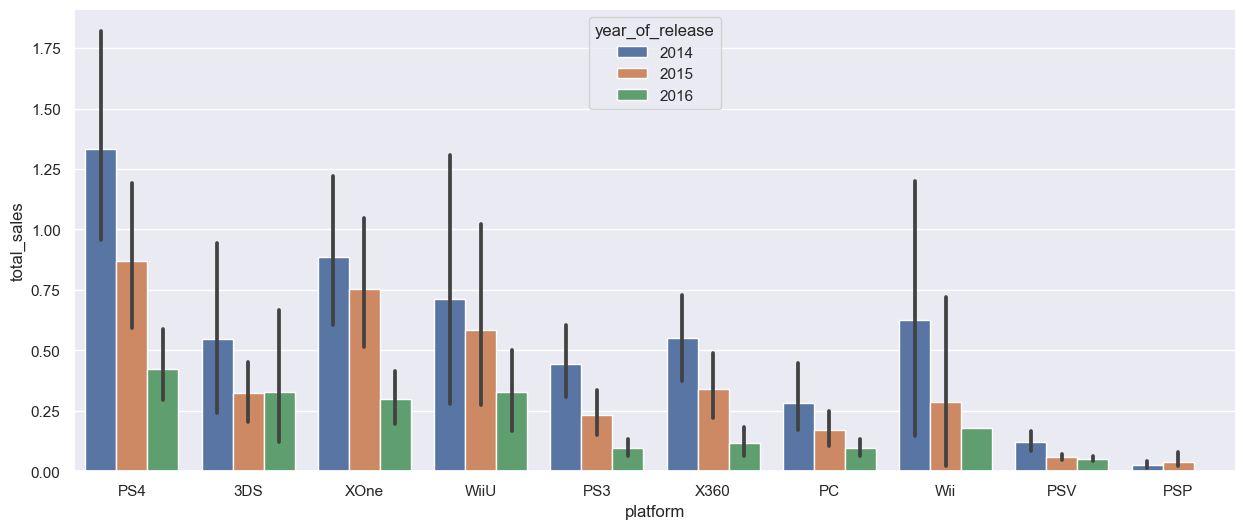

In [33]:
data_2014_2016 = data.query('2014 <= year_of_release <= 2016')
sns.set(rc = {"figure.figsize":(15,6)})
sns.barplot(x = data_2014_2016['platform'],
            y = data_2014_2016['total_sales'],
            hue = data_2014_2016['year_of_release']);

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

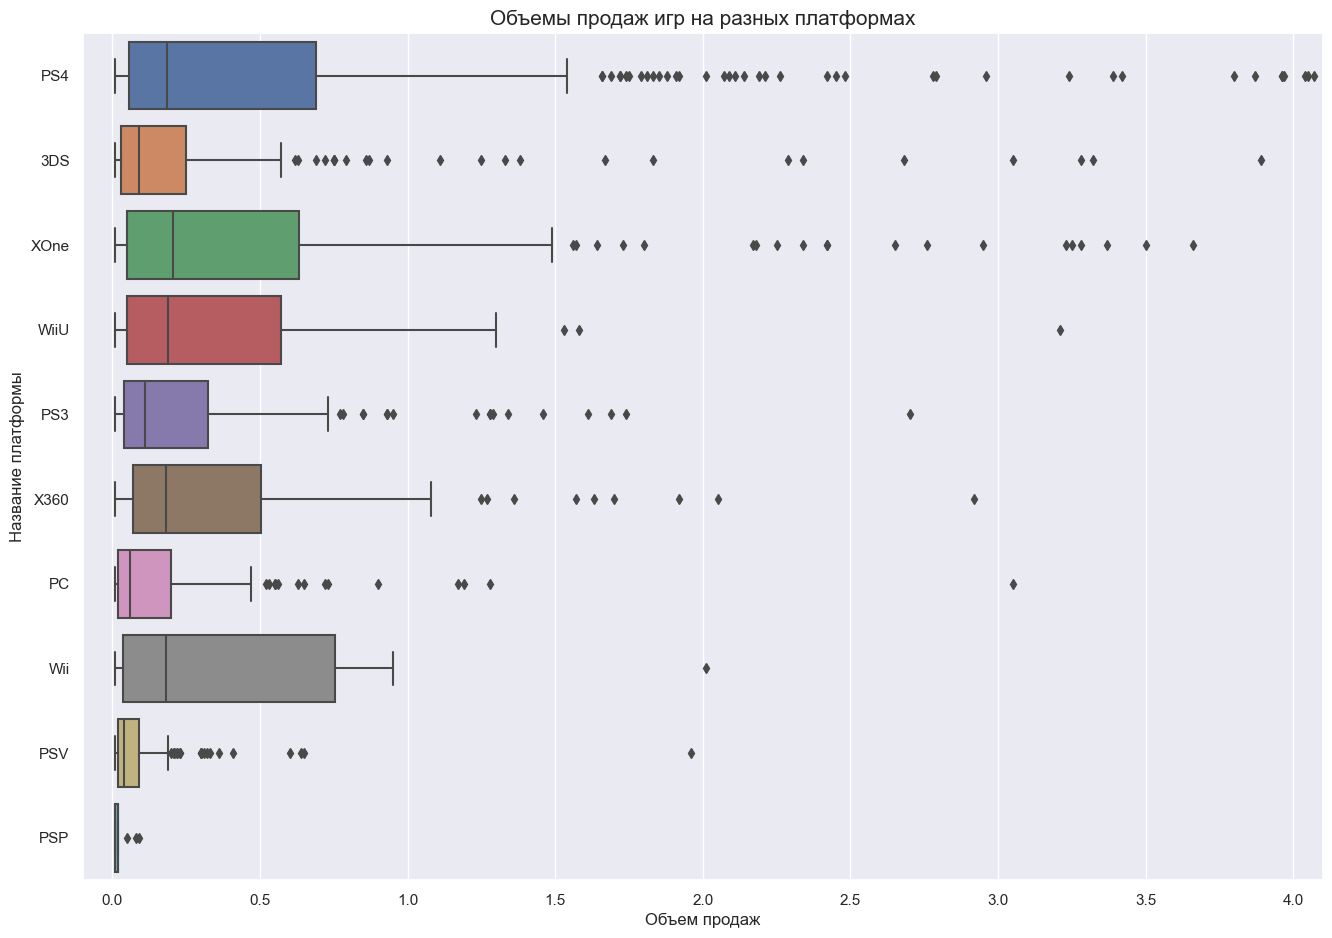

In [34]:
plt.figure(figsize = (16, 11))
sns.boxplot(data = data_2014_2016, y = 'platform', x = 'total_sales')
plt.xlim(-0.1, 4.1)

plt.title('Объемы продаж игр на разных платформах', size = 15)
plt.xlabel('Объем продаж', size = 12)
plt.ylabel('Название платформы', size = 12)

plt.show()

Посмотрим медиану кол-ва продаж игр по всем платформам

In [35]:
print('Среднее кол-во продаж на игру по платформе:')
for platform in (data_2014_2016['platform'].unique()):
    data_top_2014_2016 = data_2014_2016.query('platform == @platform')
    print(platform, ' - ', round(data_top_2014_2016['total_sales'].mean(), 2), 'млн.шт.')

Среднее кол-во продаж на игру по платформе:
PS4  -  0.77 млн.шт.
3DS  -  0.41 млн.шт.
XOne  -  0.62 млн.шт.
WiiU  -  0.59 млн.шт.
PS3  -  0.31 млн.шт.
X360  -  0.43 млн.шт.
PC  -  0.18 млн.шт.
Wii  -  0.46 млн.шт.
PSV  -  0.08 млн.шт.
PSP  -  0.03 млн.шт.


Посмотрим статистические параметры по продажам в распределении по платформам Топ-3:
- PS4
- XOne
- WiiU

In [36]:
PS4_2014_2016 = data_2014_2016.query('platform == "PS4"')
PS4_2014_2016['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [37]:
XOne_2014_2016 = data_2014_2016.query('platform == "XOne"')
XOne_2014_2016['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

In [38]:
WiiU_2014_2016 = data_2014_2016.query('platform == "WiiU"')
WiiU_2014_2016['total_sales'].describe()

count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64

**Вывод:**

Период 2014-2016 год

- Среднее кол-во продаж на игру по платформе PS4:  766 тыс. 3/4 игр продавались до 689 тыс. Рекорд 14,6 млн.

- Среднее кол-во продаж на игру по платформе XOne: 615 тыс. 3/4 игр продавались до 632 тыс. Рекорд 7,39 млн.

- Среднее кол-во продаж на игру по платформе WiiU: 588 тыс. 3/4 игр продавались до 569 тыс. Рекорд 7,09 млн.

Для PS4 видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на платформе делаются более популярные и продаваемые игры, чем на XOne и WiiU.

Посмотрим, как влияют на продажи внутри одной популярной платформы 'PS4' отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [39]:
PS4_ratings = PS4_2014_2016.loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_ratings = PS4_ratings.query('user_score > 0')

Рейтинг критиков изменяется в интервале 0-100, пользовательский рейтинг в интервале 0-10, умножим его на 10 для удобства.

In [40]:
PS4_ratings['user_score'] = PS4_ratings['user_score'] * 10

Посмотрим матрицу корреляций между продажами и рейтингами пользователей и критиков

In [41]:
PS4_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.401903,-0.040132
critic_score,0.401903,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


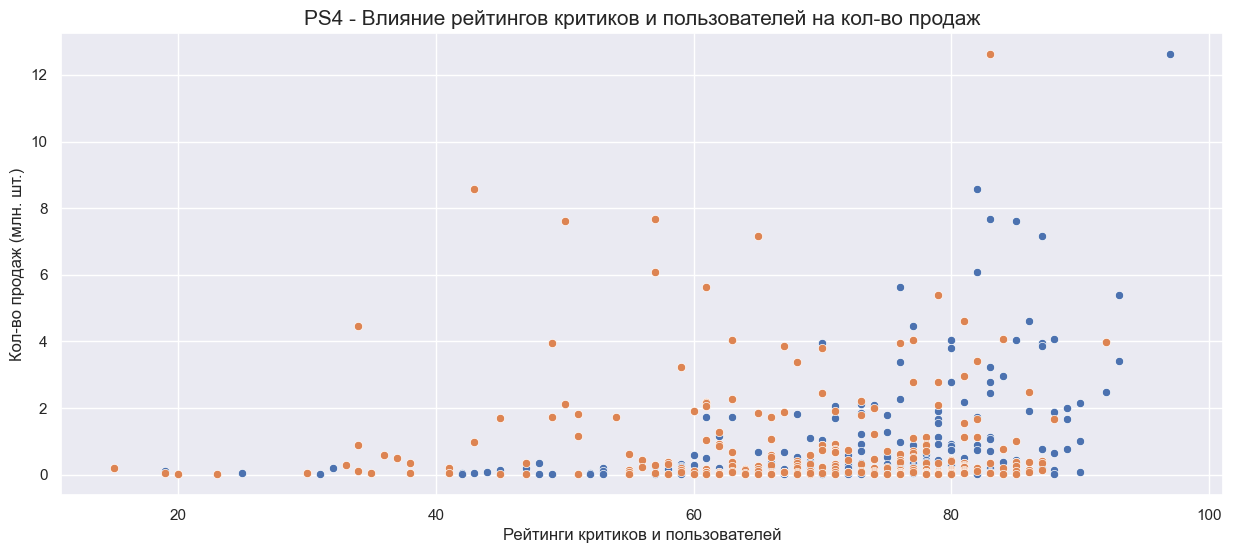

In [42]:
sns.scatterplot(data = PS4_ratings, x = 'critic_score', y = 'total_sales')
sns.scatterplot(data = PS4_ratings, x = 'user_score', y = 'total_sales')

plt.title('PS4 - Влияние рейтингов критиков и пользователей на кол-во продаж', size = 15)
plt.xlabel('Рейтинги критиков и пользователей', size = 12)
plt.ylabel('Кол-во продаж (млн. шт.)', size = 12)
plt.show()

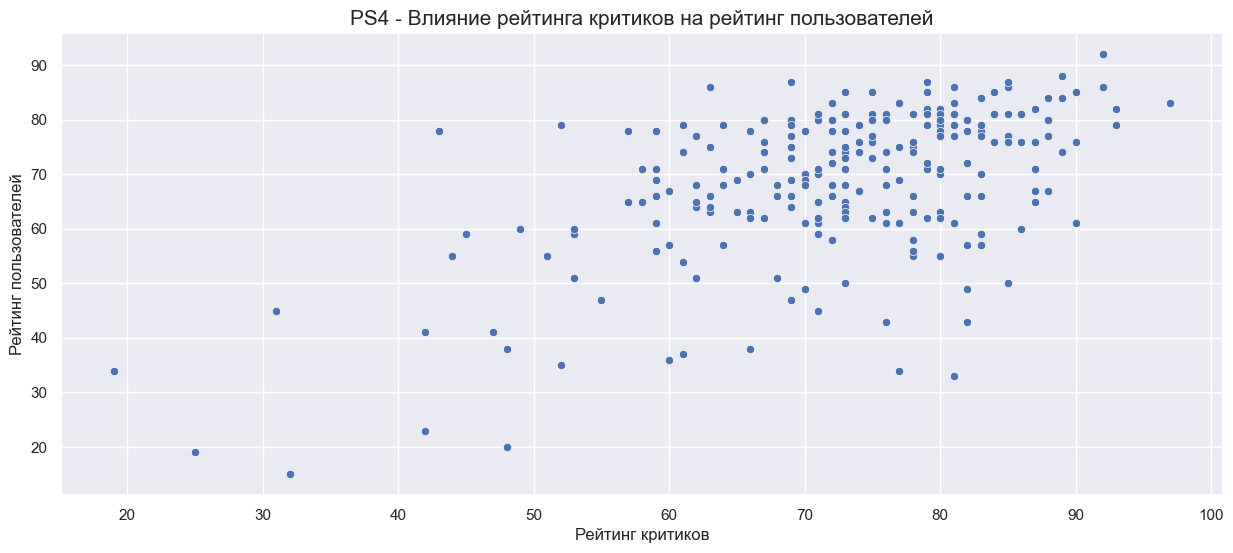

In [43]:
sns.scatterplot(data = PS4_ratings, x = 'critic_score', y = 'user_score')
plt.title('PS4 - Влияние рейтинга критиков на рейтинг пользователей', size = 15)
plt.xlabel('Рейтинг критиков', size = 12)
plt.ylabel('Рейтинг пользователей', size = 12)
plt.show()

Посмотрим, как влияют на продажи внутри одной популярной платформы 'XOne' отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [44]:
XOne_ratings = XOne_2014_2016.loc[:,['total_sales', 'critic_score', 'user_score']]
XOne_ratings = XOne_ratings.query('user_score > 0')

Рейтинг критиков изменяется в интервале 0-100, пользовательский рейтинг в интервале 0-10, умножим его на 10 для удобства

In [45]:
XOne_ratings['user_score'] = XOne_ratings['user_score'] * 10
XOne_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.422112,-0.070384
critic_score,0.422112,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


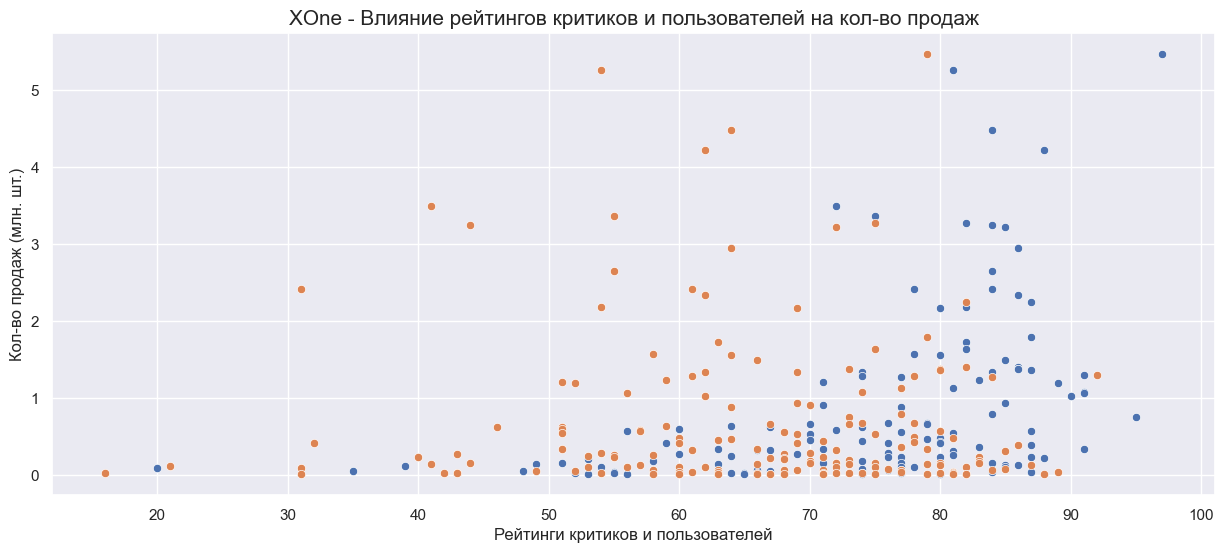

In [46]:
sns.scatterplot(data = XOne_ratings, x = 'critic_score', y = 'total_sales')
sns.scatterplot(data = XOne_ratings, x = 'user_score', y = 'total_sales')

plt.title('XOne - Влияние рейтингов критиков и пользователей на кол-во продаж', size = 15)
plt.xlabel('Рейтинги критиков и пользователей', size = 12)
plt.ylabel('Кол-во продаж (млн. шт.)', size = 12)
plt.show()

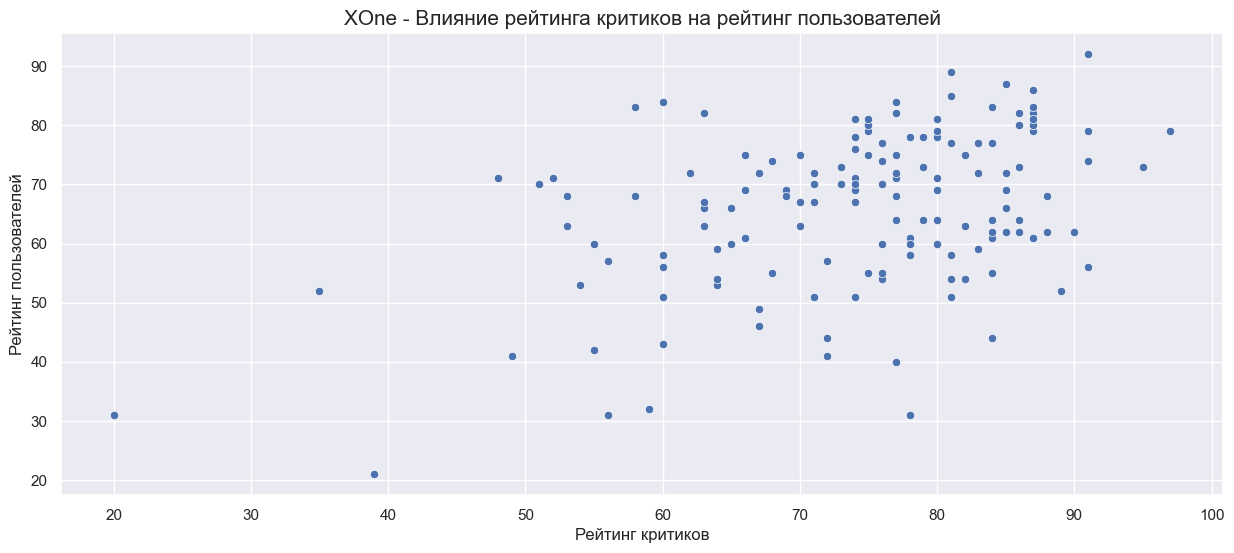

In [47]:
sns.scatterplot(data = XOne_ratings, x = 'critic_score', y = 'user_score')
plt.title('XOne - Влияние рейтинга критиков на рейтинг пользователей', size = 15)
plt.xlabel('Рейтинг критиков', size = 12)
plt.ylabel('Рейтинг пользователей', size = 12)
plt.show()

Посмотрим, как влияют на продажи внутри одной популярной платформы 'WiiU' отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [48]:
WiiU_ratings = WiiU_2014_2016.loc[:,['total_sales', 'critic_score', 'user_score']]
WiiU_ratings = WiiU_ratings.query('user_score > 0')

Рейтинг критиков изменяется в интервале 0-100, пользовательский рейтинг в интервале 0-10, умножим его на 10 для удобства

In [49]:
WiiU_ratings['user_score'] = WiiU_ratings['user_score'] * 10
WiiU_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.375640,0.407926
critic_score,0.375640,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


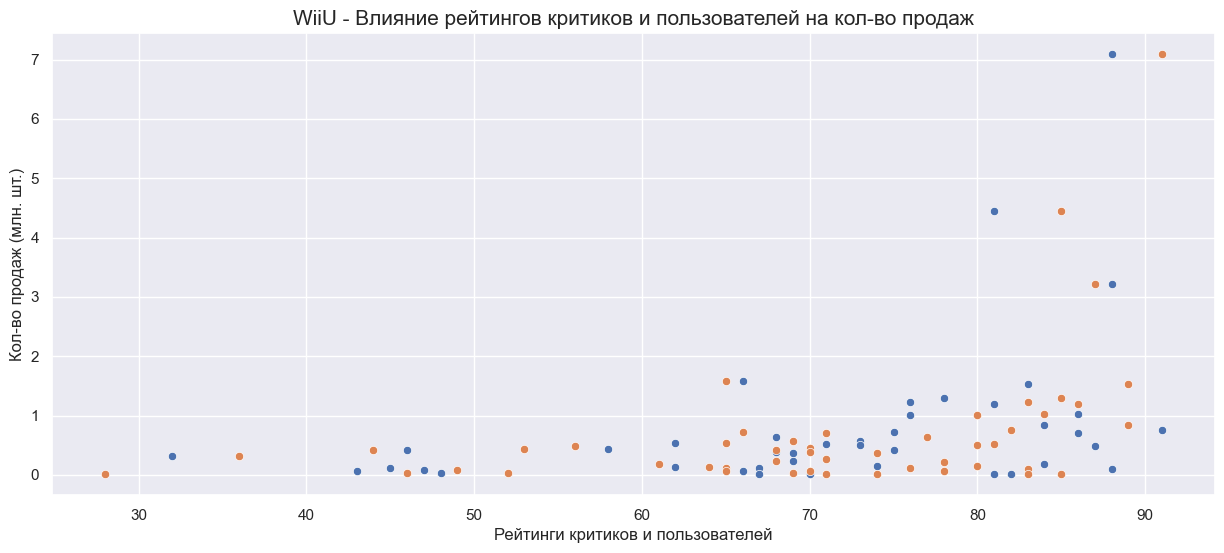

In [50]:
sns.scatterplot(data = WiiU_ratings, x = 'critic_score', y = 'total_sales')
sns.scatterplot(data = WiiU_ratings, x = 'user_score', y = 'total_sales')

plt.title('WiiU - Влияние рейтингов критиков и пользователей на кол-во продаж', size = 15)
plt.xlabel('Рейтинги критиков и пользователей', size = 12)
plt.ylabel('Кол-во продаж (млн. шт.)', size = 12)
plt.show()

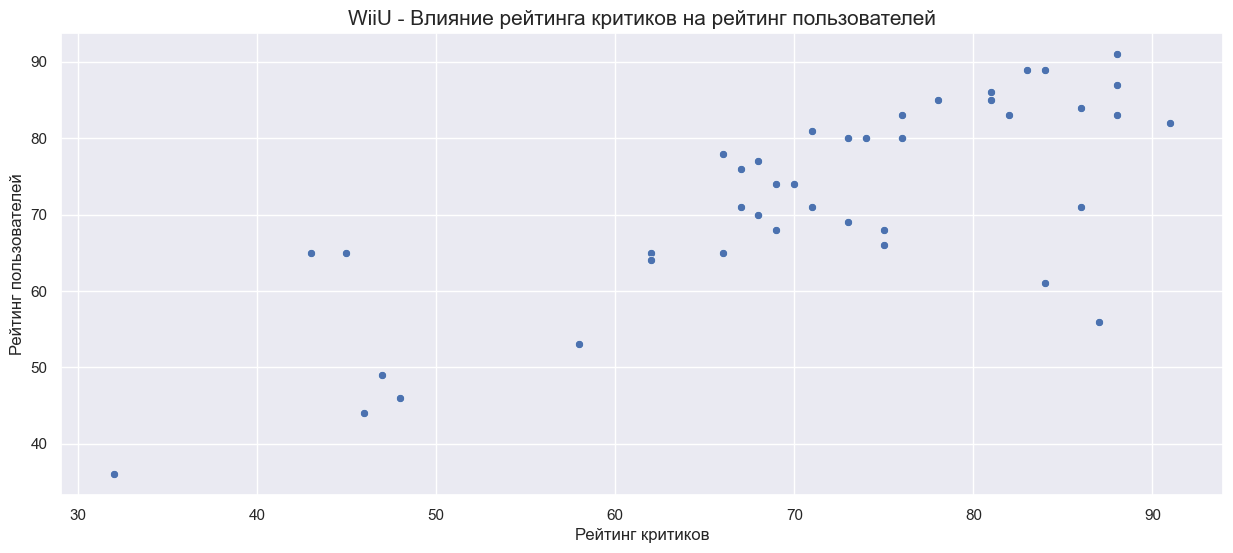

In [51]:
sns.scatterplot(data = WiiU_ratings, x = 'critic_score', y = 'user_score')
plt.title('WiiU - Влияние рейтинга критиков на рейтинг пользователей', size = 15)
plt.xlabel('Рейтинг критиков', size = 12)
plt.ylabel('Рейтинг пользователей', size = 12)
plt.show()

**Вывод:**

Кореляция кол-ва продаж и мнения критиков выглядит следующим образом:
- PS4 : 0.375640
- XBox: 0.375640
- WiiU: 0.375640

и можно сделать вывод, что продажи игр на PS4 зависят от рейтинга критиков, но меньше чем XBox One, и еще меньше чем WiiU.

Это может говорить о том, что для платформы PS4 наиболее важными критерием является качество игры.

Кореляция кол-ва продаж и мнения пользователей выглядит следующим образом:
- PS4 : -0.040132
- XBox: -0.070384
- WiiU: 0.407926

и можно сделать вывод, что продажи игр на PS4 и XBox One практически не зависят от рейтинга пользователей, а вот на продажи WiiU рейтинг пользователей влияет очень сильно.

Важно заметить, что на мнение игроков влияет рейтинг критиков. То есть, чем выше оценит игру критик, тем выше оценит ее игрок, особенно для игр на платформе WiiU.

Посмотрим на общее распределение игр по жанрам. Посмотрим сколько принесла продаж каждая игра.

In [52]:
genre_name_pvt = pd.pivot_table(data_2014_2016, index = ['genre', 'name'],
                                                values = 'total_sales',
                                                aggfunc = 'sum').reset_index()
genre_name_pvt.columns=['genre', 'name', 'sum']
display(genre_name_pvt)

,genre,name,sum
0,Action,3rd Super Robot Wars Z: Tengoku-Hen,0.34
1,Action,7 Days to Die,0.19
2,Action,A Good Librarian Like a Good Shepherd: Library...,0.03
3,Action,Abunai: Koi no Sousa Shitsu,0.02
4,Action,Adventure Time: Finn & Jake Investigations,0.46
...,...,...,...
951,Strategy,Total War Attila: Tyrants & Kings,0.01
952,Strategy,Total War: Attila,0.24
953,Strategy,Total War: WARHAMMER,0.13
954,Strategy,War for the Overworld,0.01


Определим медиану продаж по жанрам

In [53]:
genre_pvt = pd.pivot_table(genre_name_pvt, index = 'genre',
                           values = 'sum', aggfunc = 'median').sort_values('sum',
                                                                ascending = False)
genre_pvt.columns = ['total_sales_median']
display(genre_pvt)

,total_sales_median
genre,
Shooter,1.620
Sports,0.450
Platform,0.415
Racing,0.405
Fighting,0.190
Role-Playing,0.150
Action,0.090
Misc,0.090
Puzzle,0.070


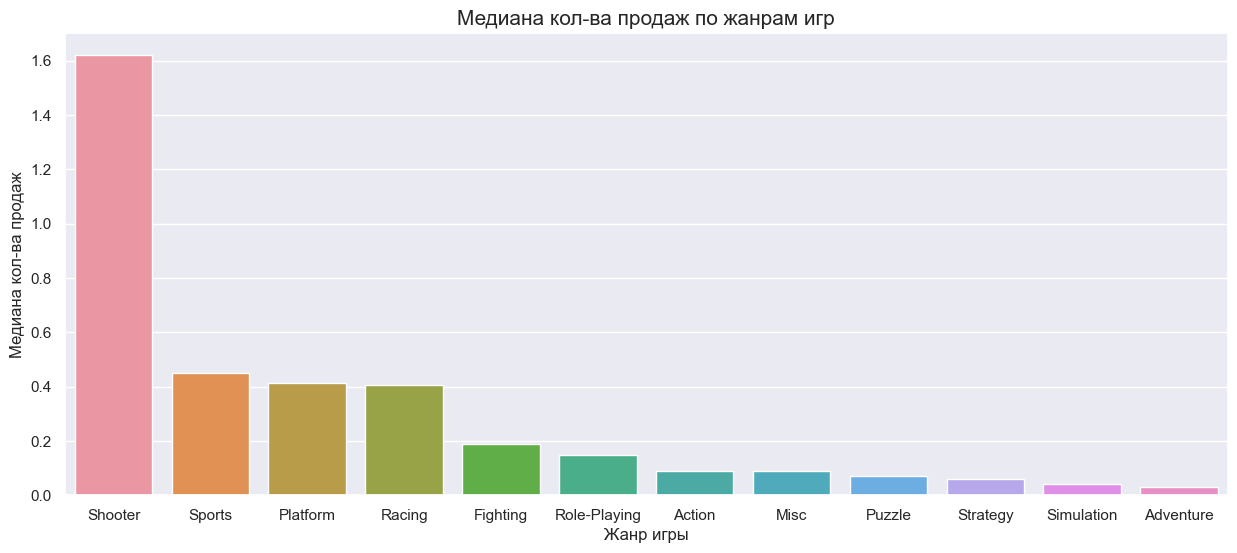

In [54]:
sns.barplot(x = genre_pvt.index, y = genre_pvt['total_sales_median'])
plt.title('Медиана кол-ва продаж по жанрам игр', size = 15)
plt.xlabel('Жанр игры', size = 12)
plt.ylabel('Медиана кол-ва продаж', size = 12)
plt.show()

**Вывод:**

Самыми прибыльными жанрами можно считать шутеры (Shooter), спортивные игры (Sports), платформеры (Platform) и гонки (Racing).

Популярность шутеров, спортивых игр и платформеров обусловлена тем, что в большинстве из них можно играть как одному, так несколько игроков одновременно. Так получаются соревнования формата 1х1, 2х2 и т.д.

В платформерах основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня. Персонажами таких игр часто бывают вымышленные существа. Привлекает "бесконечный" геймплей.

Рэсинг - жанр компьютерных игр с видом от первого или от третьего лица, в которых игрок принимает участие в гоночном соревновании среди наземных, водных, воздушных или космических транспортных средств. Привлекают адреналином и быстротой развития событий.

Популярность экшена обусловлена историей создания игр и желания людей проверить свои навыки ловкости и реакции. Очень похожий на него тип жанра Misc.

Ролевые игры затягивают игроков своей сложностью к прохождению игры и соответсвенно в нее играют часто и даже перепроходят много раз, что увеличивает интерес к будущим дополнениям или повышают вероятность рассказа об этой игре друзьям.

На период 2014-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation), головоломки (Puzzle) и стратегии реального времени или пошаговые (Strategy).

Головоломки были популярны с 80х годов, но сейчас становится все меньше ценителей этого жанра. Текущее поколение хочет захватывающих действий. Приключение, хоть и появилось позже, оно имеет похожую тенденцию.

Симуляторы - это повторение реальной жизни или аспектов реальной жизни сейчас, в прошлом или в будущем. Этот жанр на любителя делать так, как ему хочется.

Стратегии редко когда поднимаются в рейтингах по продажам в ввиду еще большей трудности и иногда неторопливости процесса.


### Составим портрета пользователя каждого региона

Определим самые популярные платформы (топ-5) по регионам

In [55]:
na_platform_pvt = pd.pivot_table(data_2014_2016, index = 'platform', values = 'na_sales',
                                 aggfunc = 'sum').sort_values('na_sales', ascending = False)
display(na_platform_pvt.head(5))

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [56]:
eu_platform_pvt = pd.pivot_table(data_2014_2016, index = 'platform', values = 'eu_sales',
                                aggfunc = 'sum').sort_values('eu_sales', ascending = False)
display(eu_platform_pvt.head(5))

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [57]:
jp_platform_pvt = pd.pivot_table(data_2014_2016, index = 'platform', values = 'jp_sales',
                                 aggfunc = 'sum').sort_values('jp_sales', ascending = False)
display(jp_platform_pvt.head(5))

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Рейтинг платформ:
- Топ 5 по Северной Америке: PS4, XOne, X360, 3DS и PS3
- Топ 5 по Европейскому региону: PS4, XOne, PS3, PC и 3DS
- Топ 5 по Японии: 3DS, PS4, PSV, PS3 и WiiU

Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.

Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

Определим самые популярные жанры (топ-5) по регинам

In [58]:
na_genre_pvt = pd.pivot_table(data_2014_2016, index = 'genre', values = 'na_sales',
                              aggfunc = 'sum').sort_values('na_sales', ascending = False)
display(na_genre_pvt.head(5))

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [59]:
eu_genre_pvt = pd.pivot_table(data_2014_2016, index = 'genre', values = 'eu_sales',
                              aggfunc = 'sum').sort_values('eu_sales', ascending = False)
display(eu_genre_pvt.head(5))

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [60]:
jp_genre_pvt = pd.pivot_table(data_2014_2016, index = 'genre', values = 'jp_sales',
                              aggfunc = 'sum').sort_values('jp_sales', ascending = False)
display(jp_genre_pvt.head(5))

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Рейтинг жанров:
- Топ 5 по Северной Америке: Shooter, Action,  Sports, Role-Playing и Misc
- Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 по Японии: Role-Playing, Action, Fighting, Misc и Shooter

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе.

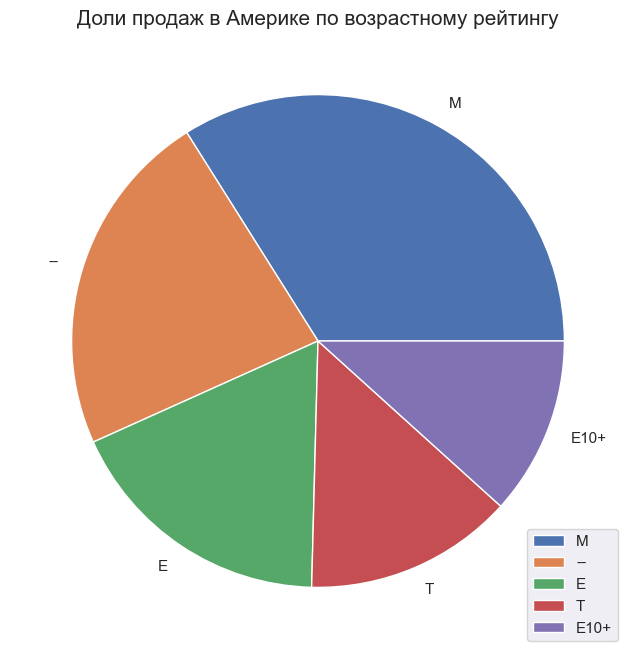

,na_sales
rating,
M,96.42
--,64.72
E,50.74
T,38.95
E10+,33.23


In [61]:
na_rating_pvt = pd.pivot_table(data_2014_2016, index = 'rating', values = 'na_sales',
                               aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_rating_pvt.plot(y = 'na_sales', kind = 'pie', figsize = (8, 8), grid = True)
plt.title('Доли продаж в Америке по возрастному рейтингу', size = 15)
plt.ylabel('')
plt.show()

display(na_rating_pvt)

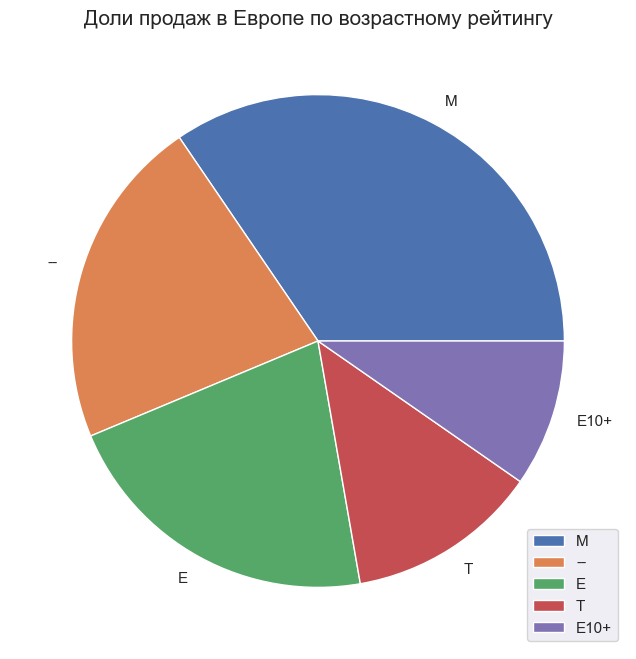

,eu_sales
rating,
M,93.44
--,58.95
E,58.06
T,34.07
E10+,26.16


In [62]:
eu_rating_pvt = pd.pivot_table(data_2014_2016, index = 'rating', values = 'eu_sales',
                               aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_rating_pvt.plot(y = 'eu_sales', kind = 'pie', figsize = (8, 8), grid = True)
plt.title('Доли продаж в Европе по возрастному рейтингу', size = 15)
plt.ylabel('')
plt.show()

display(eu_rating_pvt)

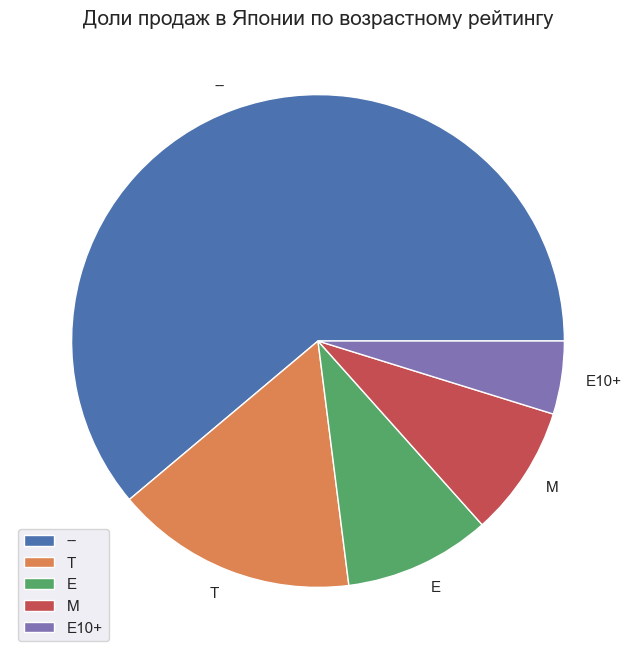

,jp_sales
rating,
--,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


In [63]:
jp_rating_pvt = pd.pivot_table(data_2014_2016, index = 'rating',
                    values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales',
                                                                      ascending = False)
jp_rating_pvt.plot(y = 'jp_sales', kind = 'pie', figsize = (8, 8), grid = True)
plt.title('Доли продаж в Японии по возрастному рейтингу', size = 15)
plt.ylabel('')
plt.show()

display(jp_rating_pvt)

**Вывод:**

Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.

Продажи игр отнесенные к категории '<>' - отсутствие рейтинга в Америке и Европе занимают второе место. В Японии с явным отрывом занимают первое место. Предполагаю, что указывать рейтинг игр почему-то не хотят.

<a id=5></a>
[Содержание](#0)
## 5. Проверка гипотез

#### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Пользовательский рейтинг (user_score) платформы "XBox One" = Пользовательский рейтинг (user_score) платформы "PC"

H_a: Пользовательский рейтинг (user_score) платформы "XBox One" != Пользовательский рейтинг (user_score) платформы "PC"

In [64]:
XOne_user_scores = data_2014_2016.query('platform == "XOne"')['user_score']
PC_user_scores = data_2014_2016.query('platform == "PC"')['user_score']

results = st.ttest_ind(
    XOne_user_scores, 
    PC_user_scores,
    equal_var = False,
    nan_policy = 'omit')

alpha = 0.05 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601379428432244
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий

#### Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Пользовательский рейтинг (user_score) игр жанра "Action" = Пользовательский рейтинг (user_score) игр жанра "Sports"

H_a: Пользовательский рейтинг (user_score) игр жанра "Action" != Пользовательский рейтинг (user_score) игр жанра "Sports"

In [65]:
action_user_scores = data_2014_2016.query('genre == "Action"')['user_score']
sports_user_scores = data_2014_2016.query('genre == "Sports"')['user_score']

results = st.ttest_ind(
    action_user_scores, 
    sports_user_scores,
    equal_var = False,
    nan_policy = 'omit')

alpha = 0.05 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825796838209195e-14
Отвергаем нулевую гипотезу


**Вывод:**

Средние пользовательские рейтинги жанров Action и Sports статистически отличаются.

Платформа XOne год за годом набирает новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой - PC. На 2016 год по качеству игр они близки к компьютерным.

Различия между Action и Sports существуют из-за опыта создания игр. Первые экшены появились в 80-х годах и из года в год они становятся интересней, так как им есть на что ровняться в прошлом. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И любителям этой серии иногда приходиться сталкиваться с непонятными решениями в этих играх.

<a id=6></a>
[Содержание](#0)
## 6. Общий вывод

#### Было выполнено:

- Просмотрена таблица, выявлены аномалии и пропущенные значения.
- Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
- Проведен анализ по данным и подготовлены актуальные данные.
- Составлены портреты пользователей для купных регионов продаж.
- Выполнены проверки гипотез.

#### Сводный анализ
Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.

По первому пунку сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.

Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-10 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.

Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

#### Рекомендации для компании на 2017 год

- Делать ставку на современные платформы.
- Покупать вышедшие и новые игры на PS4, XOne и WiiU.
- Выставлять на прилавки популярные жанры - шутеры (Shooter), спортивные игры (Sports), платформеры (Platform) и гонки (Racing).
- Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
- Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.